In [1]:
import numpy as np
import matplotlib.pyplot as plt

def frange(min, max, factor):
    return [x/factor for x in range(min*factor, max*factor)]

def plotXY(vals):
    vx = [x for (x, y) in vals]
    vy = [y for (x, y) in vals]
    plt.plot(vx, vy)

$erf(x)≈tanh(\frac{x\pi}{\sqrt6})≈\frac{e^{\pi x \frac{2}{\sqrt3}} - 1}{e^{\pi x \frac{2}{\sqrt3}} + 1}$

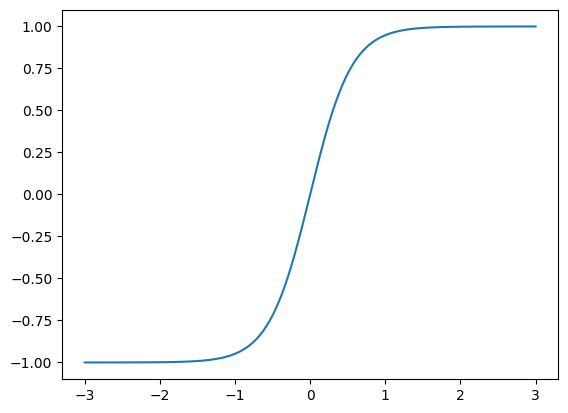

In [2]:
def erf(x):
    term = np.exp(np.pi * x * 2 / np.sqrt(3))
    result = (term - 1) / (term + 1)
    return result

plotXY([(x, erf(x)) for x in frange(-3, 3, 1000)])
plt.show()

$\Phi (x)={\frac  {1}{2}}\left[1+\operatorname {erf}\left({\frac  {x}{{\sqrt  {2}}}}\right)\right]$

In [3]:
def Phi(x):
    return 0.5 * (1 + erf(x / np.sqrt(2)))

$\phi (x)={\frac  {1}{{\sqrt  {2\pi }}}}e^{{-{\frac  {x^{2}}{2}}}}$

In [4]:
def phi(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

$f(x)=2\phi (x)\Phi (\alpha x)\$

In [5]:
def f(x, α, ω, ξ):
    x += ξ
    return ω * (2*phi(x)*Phi(α * x))

In [6]:
α = 0 # skew
ω = 1 # scale
ξ = 0 # location

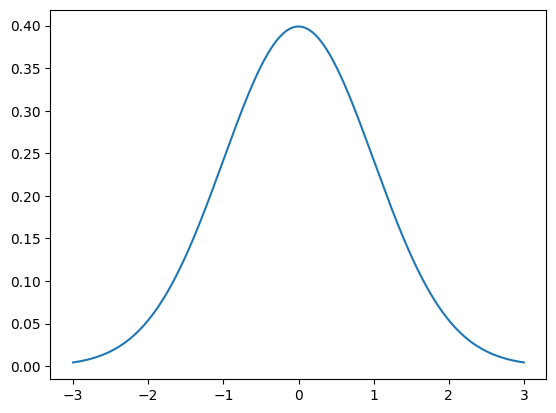

In [7]:
plotXY([(x, f(x, α, ω, ξ)) for x in frange(-3, 3, 1000)])
plt.show()

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def widget(α, ω, ξ, width, zoom):
    plotXY([((x) + ξ, f(((x) * width) - ξ, α, ω, ξ)) for x in frange(-1 * zoom, 1 * zoom, 1000)])
    plt.show()

interact(widget, α = widgets.FloatSlider(min=-10, max=10, step=0.01, value=0.0), 
         ω = widgets.FloatSlider(min=-1000, max=1000, step=1.0, value=1.0),
         ξ = widgets.FloatSlider(min=-100, max=100, step=0.01, value=0.0),
         width = widgets.FloatSlider(min=0.00001, max=1, value=1, step=0.00001),
         zoom = widgets.IntSlider(min=0, max=100, value=3))

interactive(children=(FloatSlider(value=0.0, description='α', max=10.0, min=-10.0, step=0.01), FloatSlider(val…

<function __main__.widget(α, ω, ξ, width, zoom)>